In [27]:
import os
import sys
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Inspired by: https://www.youtube.com/watch?v=t2ym2a3pb_Y

In [50]:
class Perceptron():

    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Init weights.
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        print(f"Initial weights and bias: {self.weights}, {self.bias}")
        for i in range(self.n_iter):
            print(f"Epoch: {i}")
            for ind, x_i in enumerate(X):
                # [0, 0] * [0, 0] + 0
                linear_out = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_out)
                print(f"\tPredicting {x_i}: {linear_out}\n\tAfter activation: {y_pred}. Correct: {y_[ind]}")  
                update = self.lr * (y_[ind] - y_pred)
                print(f"\tProposed update: {update}")
                update_w = update * x_i
                self.weights += update_w
                self.bias += update
                print(f"New weights and bias: {self.weights}, {self.bias}\n--\n")
            print(f"Weights: {self.weights} and {self.bias}")


    def predict(self, X):
        linear_out = np.dot(X, self.weights)  + self.bias
        y_pred = self.activation_func(linear_out)

        return y_pred

In [29]:
def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_true)
    return acc

In [30]:
def train_perceptron(X_train, y_train):
    p = Perceptron(lr=0.01, n_iter=10)
    p.fit(X_train, y_train)
    return p

In [31]:
def predict_perceptron(p, X_test):
    predictions = p.predict(X_test)
    return predictions

In [44]:
def visualize_data(p, X_train, y_train):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)

    x0_1 = np.amin(X_train[:,0])
    x0_2 = np.amax(X_train[:,0])

    print(x0_1, x0_2)
    
    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    print(x1_1, x1_2)
    
    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

    ymin = np.amin(X_train[:,1])
    ymax = np.amax(X_train[:,1])
    ax.set_ylim([ymin-3, ymax+3])

### Testing Perceptron
- AND
- OR
- XOR

In [33]:
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [34]:
print(X_train, y_train)

[[-2.03531849e+00 -1.00940607e+01]
 [ 2.18263294e+00 -9.04732063e-01]
 [-2.15303534e-01 -1.74140074e+00]
 [-1.30018898e+00 -8.24772408e+00]
 [-6.38194139e-01 -9.43110624e+00]
 [ 1.90632766e+00 -2.43499725e+00]
 [-1.13128258e+00 -1.01218094e+00]
 [ 1.05336305e+00 -1.12650924e+00]
 [-4.14163801e-01 -8.17085180e+00]
 [ 9.85268362e-01 -2.27407434e+00]
 [ 2.39559403e+00 -9.75791345e-01]
 [ 5.30737681e+00 -4.31375226e-01]
 [-2.77238005e+00 -9.64264532e+00]
 [ 1.63390085e+00 -8.48880402e-01]
 [-3.24159714e+00 -7.66373146e+00]
 [-1.32165071e+00 -9.13917176e+00]
 [ 3.50550070e-01 -1.66237773e+00]
 [-1.57009042e+00 -1.00242035e+01]
 [-5.32783010e-01 -1.64847081e+00]
 [-2.43377785e+00 -7.81776395e+00]
 [ 1.57354644e+00 -2.17601731e+00]
 [-2.29717776e-01 -9.88162251e+00]
 [ 1.69068204e+00 -5.21923247e-01]
 [ 2.16703063e+00 -1.58150634e+00]
 [-6.48510353e-01 -9.47763290e+00]
 [-2.90411030e+00 -1.16682599e+01]
 [ 4.89265190e-01 -2.36418370e+00]
 [ 2.60159789e+00 -3.37869021e+00]
 [ 1.40959572e+00 -1

In [35]:
X_train.shape

(120, 2)

In [36]:
p = train_perceptron(X_train, y_train)
predictions = predict_perceptron(p, X_test)

Epoch: 0
	Predicting [ -2.03531849 -10.09406069]: 0.0
	After activation: 1
	Proposed update: -0.01
New weights and bias: [0.02035318 0.10094061], -0.01
--

	Predicting [ 2.18263294 -0.90473206]: -0.05690067171936176
	After activation: 0
	Proposed update: 0.01
New weights and bias: [0.04217951 0.09189329], 0.0
--

	Predicting [-0.21530353 -1.74140074]: -0.1691044353408336
	After activation: 0
	Proposed update: 0.01
New weights and bias: [0.04002648 0.07447928], 0.01
--

	Predicting [-1.30018898 -8.24772408]: -0.6563265284542192
	After activation: 0
	Proposed update: 0.0
New weights and bias: [0.04002648 0.07447928], 0.01
--

	Predicting [-0.63819414 -9.43110624]: -0.7179666557185914
	After activation: 0
	Proposed update: 0.0
New weights and bias: [0.04002648 0.07447928], 0.01
--

	Predicting [ 1.90632766 -2.43499725]: -0.09505325508373794
	After activation: 0
	Proposed update: 0.01
New weights and bias: [0.05908976 0.05012931], 0.02
--

	Predicting [-1.13128258 -1.01218094]: -0.09758713

In [37]:
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


-4.072523886362587 5.307376812569644
0.26558783016384363 -12.133975883017737


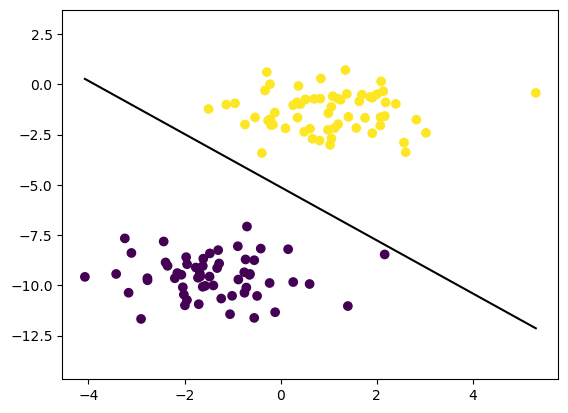

In [45]:
visualize_data(p, X_train, y_train)

## Testing OR

In [47]:
X_train = X_test = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = y_test = np.array([0, 1, 1, 1])
print(X_train, y_train)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 1 1 1]


In [51]:
p = train_perceptron(X_train, y_train)
predictions = predict_perceptron(p, X_test)
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Initial weights and bias: [0. 0.], 0
Epoch: 0
	Predicting [0 0]: 0.0
	After activation: 1. Correct: 0
	Proposed update: -0.01
New weights and bias: [0. 0.], -0.01
--

	Predicting [0 1]: -0.01
	After activation: 0. Correct: 1
	Proposed update: 0.01
New weights and bias: [0.   0.01], 0.0
--

	Predicting [1 0]: 0.0
	After activation: 1. Correct: 1
	Proposed update: 0.0
New weights and bias: [0.   0.01], 0.0
--

	Predicting [1 1]: 0.01
	After activation: 1. Correct: 1
	Proposed update: 0.0
New weights and bias: [0.   0.01], 0.0
--

Weights: [0.   0.01] and 0.0
Epoch: 1
	Predicting [0 0]: 0.0
	After activation: 1. Correct: 0
	Proposed update: -0.01
New weights and bias: [0.   0.01], -0.01
--

	Predicting [0 1]: 0.0
	After activation: 1. Correct: 1
	Proposed update: 0.0
New weights and bias: [0.   0.01], -0.01
--

	Predicting [1 0]: -0.01
	After activation: 0. Correct: 1
	Proposed update: 0.01
New weights and bias: [0.01 0.01], 0.0
--

	Predicting [1 1]: 0.02
	After activation: 1. Correct: 1

0 1
1.0 0.0


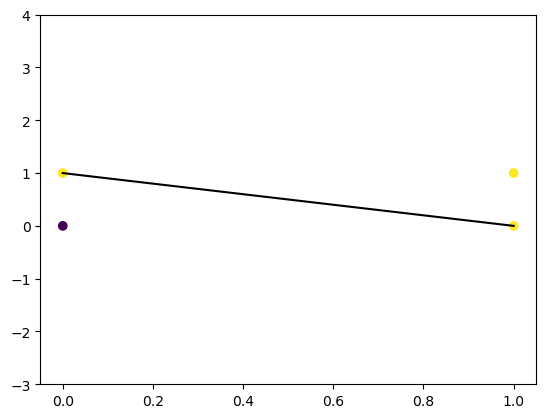

In [49]:
visualize_data(p, X_train, y_train)

## Testing AND

In [52]:
X_train = X_test = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = y_test = np.array([0, 0, 0, 1])
print(X_train, y_train)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 0 0 1]


In [53]:
p = train_perceptron(X_train, y_train)
predictions = predict_perceptron(p, X_test)
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Initial weights and bias: [0. 0.], 0
Epoch: 0
	Predicting [0 0]: 0.0
	After activation: 1. Correct: 0
	Proposed update: -0.01
New weights and bias: [0. 0.], -0.01
--

	Predicting [0 1]: -0.01
	After activation: 0. Correct: 0
	Proposed update: 0.0
New weights and bias: [0. 0.], -0.01
--

	Predicting [1 0]: -0.01
	After activation: 0. Correct: 0
	Proposed update: 0.0
New weights and bias: [0. 0.], -0.01
--

	Predicting [1 1]: -0.01
	After activation: 0. Correct: 1
	Proposed update: 0.01
New weights and bias: [0.01 0.01], 0.0
--

Weights: [0.01 0.01] and 0.0
Epoch: 1
	Predicting [0 0]: 0.0
	After activation: 1. Correct: 0
	Proposed update: -0.01
New weights and bias: [0.01 0.01], -0.01
--

	Predicting [0 1]: 0.0
	After activation: 1. Correct: 0
	Proposed update: -0.01
New weights and bias: [0.01 0.  ], -0.02
--

	Predicting [1 0]: -0.01
	After activation: 0. Correct: 0
	Proposed update: 0.0
New weights and bias: [0.01 0.  ], -0.02
--

	Predicting [1 1]: -0.01
	After activation: 0. Correct

0 1
3.0 0.9999999999999998


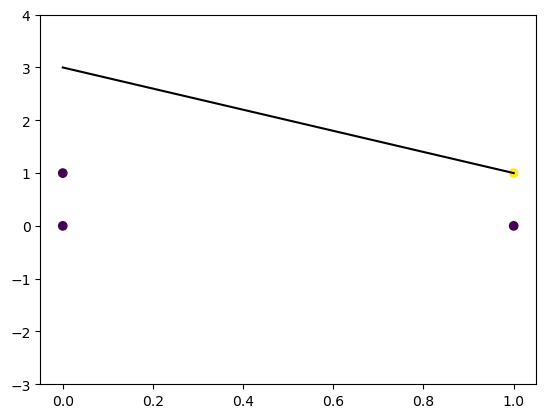

In [54]:
visualize_data(p, X_train, y_train)

## Testing XOR

In [55]:
X_train = X_test = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = y_test = np.array([0, 1, 1, 0])
print(X_train, y_train)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 1 1 0]


In [56]:
p = train_perceptron(X_train, y_train)
predictions = predict_perceptron(p, X_test)
print("Perceptron classification accuracy", accuracy(y_test, predictions))

Initial weights and bias: [0. 0.], 0
Epoch: 0
	Predicting [0 0]: 0.0
	After activation: 1. Correct: 0
	Proposed update: -0.01
New weights and bias: [0. 0.], -0.01
--

	Predicting [0 1]: -0.01
	After activation: 0. Correct: 1
	Proposed update: 0.01
New weights and bias: [0.   0.01], 0.0
--

	Predicting [1 0]: 0.0
	After activation: 1. Correct: 1
	Proposed update: 0.0
New weights and bias: [0.   0.01], 0.0
--

	Predicting [1 1]: 0.01
	After activation: 1. Correct: 0
	Proposed update: -0.01
New weights and bias: [-0.01  0.  ], -0.01
--

Weights: [-0.01  0.  ] and -0.01
Epoch: 1
	Predicting [0 0]: -0.01
	After activation: 0. Correct: 0
	Proposed update: 0.0
New weights and bias: [-0.01  0.  ], -0.01
--

	Predicting [0 1]: -0.01
	After activation: 0. Correct: 1
	Proposed update: 0.01
New weights and bias: [-0.01  0.01], 0.0
--

	Predicting [1 0]: -0.01
	After activation: 0. Correct: 1
	Proposed update: 0.01
New weights and bias: [0.   0.01], 0.01
--

	Predicting [1 1]: 0.02
	After activatio

0 1
nan inf


/tmp/ipykernel_352166/4001263652.py:11: RuntimeWarning: invalid value encountered in scalar divide
  x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
/tmp/ipykernel_352166/4001263652.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]


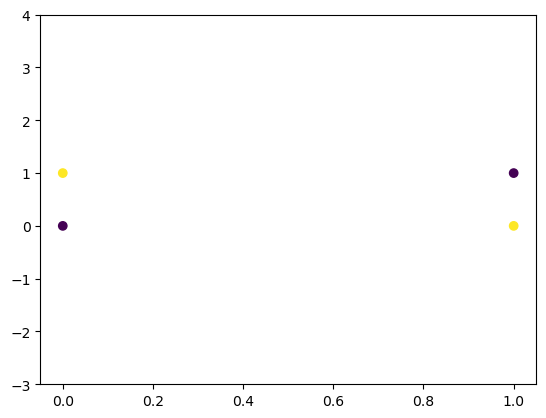

In [57]:
visualize_data(p, X_train, y_train)